<img src ="https://github.com/jcjaylani/Storage/blob/main/Revised%20Neuronal%20Alpha-Synuclein%20Disease.gif?raw=true"
  alt="Image" 
     width ="2400"
     height = "1200"
  />

In [ ]:
<a id="section-1"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:150%;text-align:center;border-radius:10px 10px;">Biomarkers in Neuronal Synuclein Disease</p>

##### Analysis by Joan Jaylani
Data downloaded with permission from Parkinson's Progression Markers Initiative (PPMI) <br>
https://www.ppmi-info.org/

<a id="section-1"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">1. Introduction</p>

#### Neuronal a-synuclein disease (NSD), refers to a group of neurodegenerative disorders which all have an anomalous accumulation of alpha-synuclein protein, synocleopathies, in neurons. This accumulation affects the neurons in the brain responsible for producing dopamine, a neurotransmitter necessary for coordinated movement. When these neurons become damaged or die, they cause diseases like Parkinson’s disease (PD) and Dementia with Lewy Bodies (DLB). 
#### The standard in clinical practice is to diagnose Parkinson’s disease by observing symptoms rather than by a blood test or other measurable biological test. Scientists have been researching biomarkers however, including skin, blood, DNA and cerebrospinal fluid to try to find a more definitive test to diagnose NSD. 

#### PPMI is a global observation study that research biomarkers for Parkinson’s Disease and related neurological disorders. The PPMI has the largest collection of images, clinical research and biological specimens in the world and has research conducted in the United States, Europe, Israel and Australia.(1)  The data is available upon approval to academic and industry researchers.¶

<a id="section-2"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">2. Objectives</p>

#### The motivation for this research project is to join in research done by industry experts to fight against these diseases. Neuronal Synuclein disease is currently incurable, and only barely beginning to be even definitively diagnosed, despite it affecting millions of people throughout the world each year.(2)  Family members and friends have been diagnosed with these diseases, and it is the hope of this team to be able to be able to contribute to the care, if not of these specific people, future people who may be able to improve their life qualities and durations as a result of these studies.

#### The first objective of this research analysis is to analyze biomarkers within tests performed on cerebrospinal fluid to determine if neuronal synuclein disease can be diagnosed with a high likelihood. The second objective is to determine a numerical threshold for testing positive, assuming the first objective is achieved.</b>

#### The dataset we are using contains numerical values related to the degree of presence or absence of alpha Synuclein Seed Assay (SAA) in cerebral spinal fluid. Our hypothesis is that there is a relationship between SAA and the types of these neurological disorders. We will look at two of the tests performed with the alpha synuclein protein on research subjects to determine the correlation between those results and the incidence of the disease.

#### 1. Fmax. The first test, the fluorescence value test (Fmax), tests for variances of the SAA protein.
#### 2. TTT: The second test, Time to Threshold (TTT) tests for the time for a substance to reach a predefined threshold. We will look at the values of these tests together and separately to determine the relationships between the tests, the presence of SAA, and the incidence of a positive diagnosis.



<a id="section-3"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">3. Importing Libraries</p>

##### You may need to install ipywidgets with a pip if you have not previously used this extension.


In [1]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ipywidgets seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
 %pip install --upgrade scikit-learn imbalanced-learn

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
Note: you may need to restart the kernel to use updated packages.


In [11]:
import sklearn, imblearn

In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import ipywidgets as widgets

To view this SSA analysis, download the SAA_Biospecimen_Analysis_Results.csv and upload it to the directory of your notebook. The directory can be found using the os code in the cell below.

In [18]:
import os
os.getcwd() 

'C:\\Users\\carba\\Buan_690_Data_Practicum\\ParkinsonsResearch'

<a id="section-4"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">4. Loading Data</p>

In [24]:
# reads file from local folder
# Load a dataset into a Pandas DataFrame
SAA_Biospecimen = pd.read_csv("SAA_Biospecimen_Analysis_Results091824.csv")

<a id="section-5"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px">5. Data Exploration </p>

In [27]:
# method relays information about the SAA Biospecimen dataframe including total columns, total entries, non-null counts and data types.

SAA_Biospecimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PATNO              1586 non-null   int64  
 1   SEX                1586 non-null   object 
 2   COHORT             1586 non-null   object 
 3   CLINICAL_EVENT     1586 non-null   object 
 4   TYPE               1586 non-null   object 
 5   SAAMethod          1586 non-null   object 
 6   SAA_Status         1586 non-null   object 
 7   SAA_Type           756 non-null    object 
 8   Fmax_24h_Rep1      931 non-null    float64
 9   Fmax_24h_Rep2      932 non-null    float64
 10  Fmax_24h_Rep3      932 non-null    float64
 11  TTT_24h_Rep1       773 non-null    float64
 12  TTT_24h_Rep2       762 non-null    float64
 13  TTT_24h_Rep3       766 non-null    float64
 14  AUC_24h_Rep1       931 non-null    float64
 15  AUC_24h_Rep2       932 non-null    float64
 16  AUC_24h_Rep3       932 n

In [29]:
SAA_Biospecimen.head()

,PATNO,SEX,COHORT,CLINICAL_EVENT,TYPE,SAAMethod,SAA_Status,SAA_Type,Fmax_24h_Rep1,Fmax_24h_Rep2,...,InstrumentRep1,InstrumentRep2,InstrumentRep3,SampleVolRep1,SampleVolRep2,SampleVolRep3,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION
0,245573,Male,PD,BL,Cerebrospinal Fluid,Amprion-24h alpha-synuclein-SAA,Positive,Type1,153626.0,146136.0,...,2,2,2,NaN,NaN,NaN,2023-12-18,237,Luis Concha,Amprion
1,241189,Female,PD,BL,Cerebrospinal Fluid,Amprion-24h alpha-synuclein-SAA,Negative,NaN,600.0,596.0,...,2,2,2,NaN,NaN,NaN,2023-12-18,237,Luis Concha,Amprion
2,163324,Male,PD,BL,Cerebrospinal Fluid,Amprion-24h alpha-synuclein-SAA,Positive,Type1,75742.0,71408.0,...,2,2,2,NaN,NaN,NaN,2023-12-18,237,Luis Concha,Amprion
3,250240,Male,PD,BL,Cerebrospinal Fluid,Amprion-24h alpha-synuclein-SAA,Positive,Type1,110430.0,106098.0,...,2,2,2,NaN,NaN,NaN,2023-12-18,237,Luis Concha,Amprion
4,164985,Male,PD,BL,Cerebrospinal Fluid,Amprion-24h alpha-synuclein-SAA,Positive,Type1,135020.0,128770.0,...,2,2,2,NaN,NaN,NaN,2023-12-18,237,Luis Concha,Amprion


We learn from the code above that there are no missing results for the index PATNO nor the SAA_Status which indicates whether or not the patient has NSD

Next we will look at the different values within SAA_Status

In [32]:

distinct_values = SAA_Biospecimen['SAA_Status'].unique()

# Display the distinct values
print(distinct_values)

distinct_count = SAA_Biospecimen['SAA_Status'].nunique()
print(f"Number of distinct values: {distinct_count}")

value_counts = SAA_Biospecimen['SAA_Status'].value_counts()

# Display the counts for each distinct value in 'SAA_Status'
print(value_counts)

['Positive' 'Negative' 'Inconclusive']
Number of distinct values: 3
SAA_Status
Positive        1252
Negative         300
Inconclusive      34
Name: count, dtype: int64


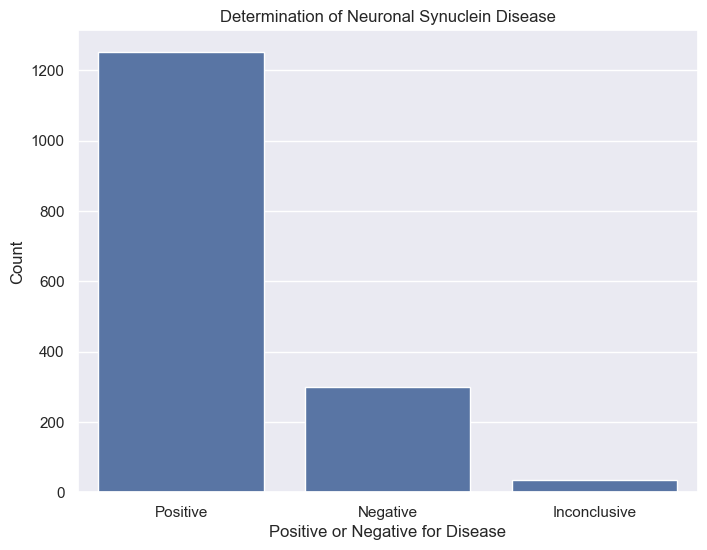

Total Study Participants: 1586
Number Participants of Positive for Neuronal Synuclein Disease: 1252
Positive Rate: 78.94%


In [34]:
# Check the distribution of the target variable (SAA_Status)
plt.figure(figsize=(8, 6)) 
sns.set(style='darkgrid')  
sns.countplot(x='SAA_Status', data=SAA_Biospecimen)
plt.title('Determination of Neuronal Synuclein Disease')
plt.xlabel('Positive or Negative for Disease')
plt.ylabel('Count')
plt.show()

# Check the Cancellation Rate
## Count total bookings
total_participants = len(SAA_Biospecimen)

# tpt on SAA_Type (including all rows)
total_participants = len(SAA_Biospecimen)

# Count the number of 'Positive' in the SAA_Status column (this is the cancellation count)
number_of_positives = SAA_Biospecimen[SAA_Biospecimen['SAA_Status'] == 'Positive'].shape[0]

# Calculate the cancellation rate as the percentage of 'Positive' statuses
positive_rate = (number_of_positives / total_participants) * 100

# Output the results
print(f'Total Study Participants: {total_participants}')
print(f'Number Participants of Positive for Neuronal Synuclein Disease: {number_of_positives}')
print(f'Positive Rate: {positive_rate:.2f}%')

Because the distribution is so skewed, it needs to be adjusted since imbalances can make it difficult to correctly
make predictions. As a result, we want to balance the distribution.

We can balance the distribution by three ways: Under-sampling, over-sampling, or SMOTE. Under-sampling can leave out important data if the sample size ends up being too small, Over-sampling increases the data size which would be acceptable in this sitation, but it can also overfit the model because data is duplicated. SMOTE reduces overfitting and balances classes better. 
SMOTE also uses more computation, but in this sitation, those additional resources are not significant.

We will use SMOTE in a further step when we are ready to perform the Logistic Regression.

We want to link variables that predict either a positive or negative result for Neuronal Synuclein Disease. As a result, 
we will drop value "Inconclusive" since that will not help our analysis and may make the results less clear

In [31]:

SAA_Biospecimen = SAA_Biospecimen[SAA_Biospecimen['SAA_Status'] != 'Inconclusive']

# Assuming df is your DataFrame
distinct_values = SAA_Biospecimen['SAA_Status'].unique()

# Display the distinct values
print(distinct_values)

distinct_count = SAA_Biospecimen['SAA_Status'].nunique()
print(f"Number of distinct values: {distinct_count}")

value_counts = SAA_Biospecimen['SAA_Status'].value_counts()

# Display the counts for each distinct value in 'SAA_Status'
print(value_counts)

['Positive' 'Negative']
Number of distinct values: 2
SAA_Status
Positive    1252
Negative     300
Name: count, dtype: int64


<a id="section-6"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">6. Reviewing Correlation</p>

All of the columns that begin with Fmax, TTT, AUC, T50, SLOPE have multiple tests that are the same except with
different time values. Additionally, because off of these tests are looking at various parts of the protein,
alpha-synuclein, many of them are highly correlated. We will create a correlation matrix to compare the correlation
of each type of test.

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

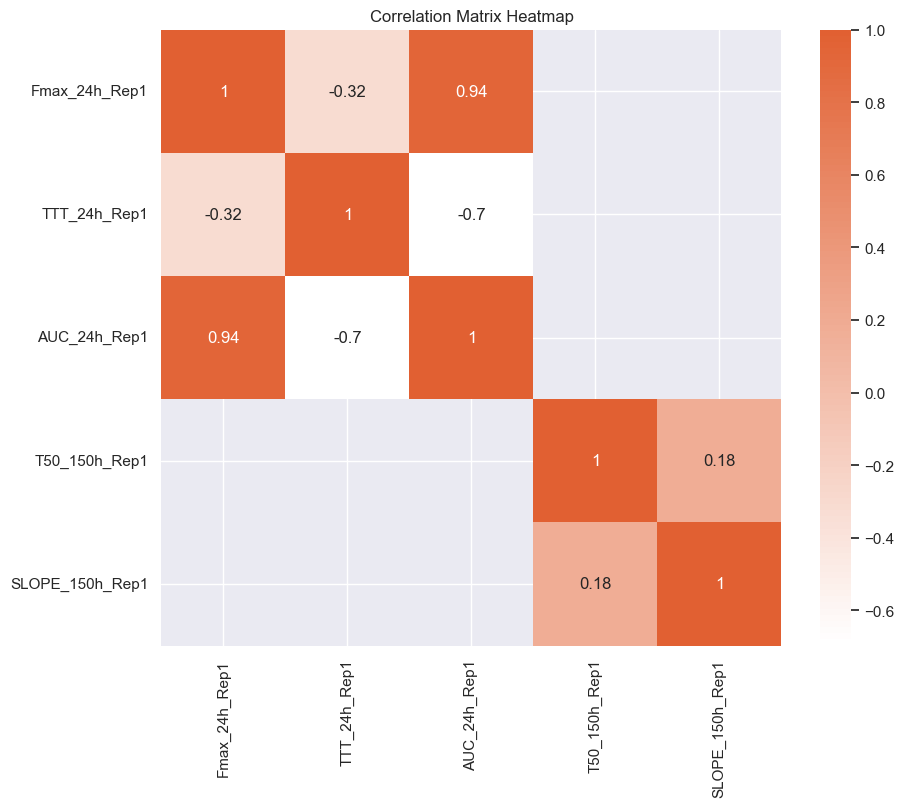

In [33]:
# Select the columns for the correlation matrix
columns = ['Fmax_24h_Rep1', 'TTT_24h_Rep1', 'AUC_24h_Rep1', 
           'T50_150h_Rep1', 'SLOPE_150h_Rep1']

# Create the correlation matrix for the selected columns
correlation_matrix = SAA_Biospecimen[columns].corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a colormap that transitions from white to #E16032
custom_colors = ['#FFFFFF', '#E16032']
cmap = LinearSegmentedColormap.from_list('custom_cmap', custom_colors, N=100)

# Create the heatmap
sns.heatmap(correlation_matrix, cmap=cmap, annot=True)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap')

As we expected, we can see that there is correlation between these tests. Also, we can see that the first three tests, Fmax_24h_Rep1, TTT_24h_Rep1, AUC_24h_Rep1 have no rows that overlap with T50_150h_Rep1, SLOPE_150h_Rep1. We will pick just two with a moderate amount of correlation as well as data overlap to continue the analysis and drop the remaining columns. 

Additionally, we will drop all categorical values not useful to this analysis.

Using values with high correlation can result in multicollinearity, and overfitting which can lead to incorrect results
and make conclusions difficult or at worst, erroneous.


<a id="section-7"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px">7. Data Preprocessing</p>

We will only want to keep a few of the most related variables. Accordingly, we will use just a slice of the data for the 
prediction algorithms.

In [38]:

# Creating a new dataframe

# List of columns we want to keep
selected_columns = [
'PATNO',                   
'SAA_Status',     
'Fmax_24h_Rep1', 
'TTT_24h_Rep1']

# Create a new DataFrame by selecting only the columns you need
Select_Biospecimen = SAA_Biospecimen[selected_columns]

# Check the new dataset
print(Select_Biospecimen.head())

    PATNO SAA_Status  Fmax_24h_Rep1  TTT_24h_Rep1
0  245573   Positive       153626.0         10.70
1  241189   Negative          600.0           NaN
2  163324   Positive        75742.0         18.07
3  250240   Positive       110430.0         15.39
4  164985   Positive       135020.0         11.74


In [39]:
# Remove rows where 'Fmax_24h_Rep1','TTT_24h_Rep1' and 'SAA_Status' have NaN values, but leave other columns untouched

Ultra_Select_Bio = Select_Biospecimen.dropna(subset=['SAA_Status','Fmax_24h_Rep1', 'TTT_24h_Rep1'], axis=0)

# Check the resulting DataFrame
print(Ultra_Select_Bio.info())


<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 0 to 1585
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PATNO          766 non-null    int64  
 1   SAA_Status     766 non-null    object 
 2   Fmax_24h_Rep1  766 non-null    float64
 3   TTT_24h_Rep1   766 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 29.9+ KB
None


In [40]:

# Checking on the number of values remaining in the dataframe after cleaning

# Assuming df is your DataFrame
distinct_values = Ultra_Select_Bio['SAA_Status'].unique()

# Display the distinct values
print(distinct_values)

distinct_count = Ultra_Select_Bio['SAA_Status'].nunique()
print(f"Number of distinct values: {distinct_count}")

value_counts = Ultra_Select_Bio['SAA_Status'].value_counts()

# Display the counts for each distinct value in 'SAA_Status'
print(value_counts)

['Positive' 'Negative']
Number of distinct values: 2
SAA_Status
Positive    745
Negative     21
Name: count, dtype: int64


In [41]:
Log_Reg_SAA = Ultra_Select_Bio

# Check the resulting DataFrame
print(Log_Reg_SAA.info())

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 0 to 1585
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PATNO          766 non-null    int64  
 1   SAA_Status     766 non-null    object 
 2   Fmax_24h_Rep1  766 non-null    float64
 3   TTT_24h_Rep1   766 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 29.9+ KB
None


<a id="section-8"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">8. Reviewing Variables Used for Prediction</p>

### Distribution of Maximum Fluorescence in RFU after 24 hours (FMax 24h) Variable

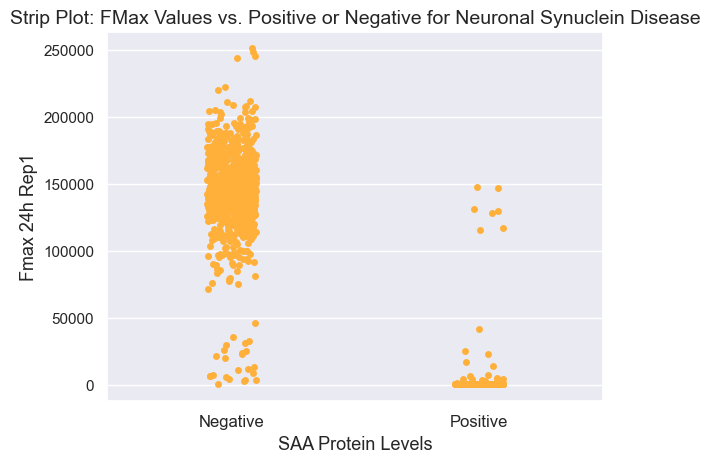

In [45]:
# Create a strip plot with filtered data
sns.stripplot(x='SAA_Status', y='Fmax_24h_Rep1', data=SAA_Biospecimen.dropna(subset=['Fmax_24h_Rep1']), jitter=True, color='#FFB03B')

# Add labels and title
plt.xlabel('SAA Protein Levels', fontsize=13)
plt.ylabel('Fmax 24h Rep1', fontsize=13)
plt.title('Strip Plot: FMax Values vs. Positive or Negative for Neuronal Synuclein Disease', fontsize=14)

# Set custom labels for the x-axis
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], fontsize=12)

plt.show()

#### Kernel Density Estimate plot and summary statistics for FMax 24h as tested on SSA Protein

In [47]:
# Convert 'SAA_Status' to numeric: 'Positive' -> 1, 'Negative' -> 0
SAA_Biospecimen['SAA_Status'] = SAA_Biospecimen['SAA_Status'].map({'Positive': 1, 'Negative': 0})


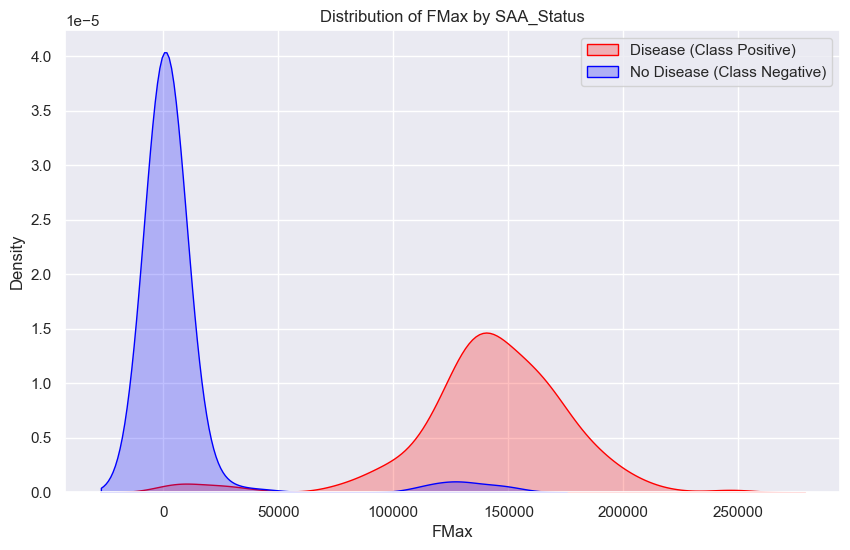

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(SAA_Biospecimen[SAA_Biospecimen['SAA_Status'] == 1]['Fmax_24h_Rep1'], label='Disease (Class Positive)', fill=True, color='red')
sns.kdeplot(SAA_Biospecimen[SAA_Biospecimen['SAA_Status'] == 0]['Fmax_24h_Rep1'], label='No Disease (Class Negative)', fill=True, color='blue')
plt.title('Distribution of FMax by SAA_Status')
plt.xlabel('FMax')
plt.ylabel('Density')
plt.legend()
plt.show()

In [49]:
Fmax_24h_Rep1 = SAA_Biospecimen['Fmax_24h_Rep1'].dropna().describe()
print(Fmax_24h_Rep1)

count       923.000000
mean     116520.590466
std       62984.315363
min         445.000000
25%      101162.500000
50%      137018.000000
75%      158904.500000
max      250877.000000
Name: Fmax_24h_Rep1, dtype: float64


### Distribution of Time To Threshold in 24 hours (TTT 24h) Variable

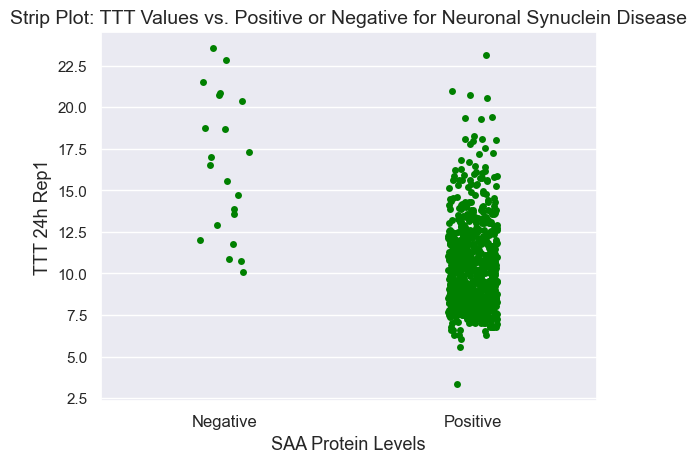

In [51]:
# Create a strip plot with filtered data
sns.stripplot(x='SAA_Status', y='TTT_24h_Rep1', data=SAA_Biospecimen.dropna(subset=['TTT_24h_Rep1']), jitter=True, color='green')

# Add labels and title
plt.xlabel('SAA Protein Levels', fontsize=13)
plt.ylabel('TTT 24h Rep1', fontsize=13)
plt.title('Strip Plot: TTT Values vs. Positive or Negative for Neuronal Synuclein Disease', fontsize=14)

# Set custom labels for the x-axis
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], fontsize=12)

plt.show()

#### Kernel Density Estimate plot and summary statistics for TTT 24h as tested on SSA Protein

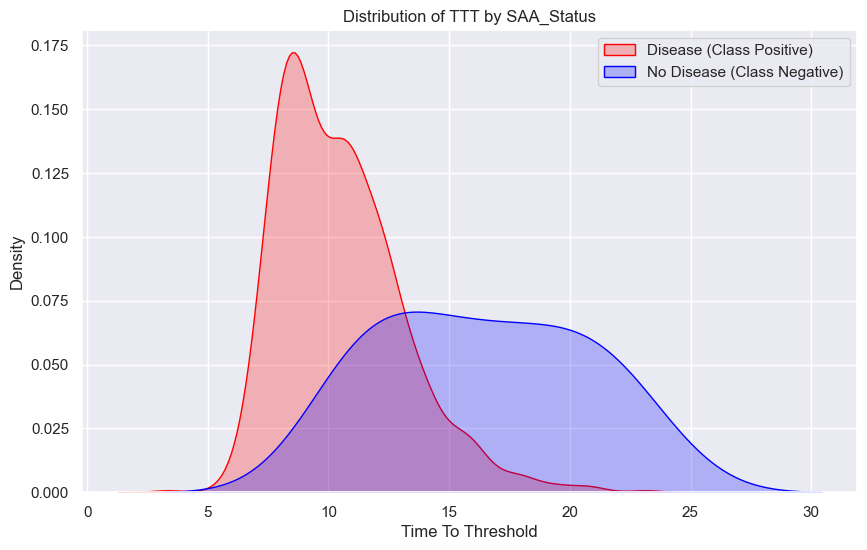

In [53]:
plt.figure(figsize=(10, 6))
sns.kdeplot(SAA_Biospecimen[SAA_Biospecimen['SAA_Status'] == 1]['TTT_24h_Rep1'], label='Disease (Class Positive)', fill=True, color='red')
sns.kdeplot(SAA_Biospecimen[SAA_Biospecimen['SAA_Status'] == 0]['TTT_24h_Rep1'], label='No Disease (Class Negative)', fill=True, color='blue')
plt.title('Distribution of TTT by SAA_Status')
plt.xlabel('Time To Threshold')
plt.ylabel('Density')
plt.legend()
plt.show()

In [54]:
# Cell 14: Summary Statistics for Time To Threshold in 24 hours (TTT 24h)
# Calculate and display summary statistics for TTT_24h_Rep1
TTT_24h_Rep1_stats = SAA_Biospecimen['TTT_24h_Rep1'].dropna().describe()
print(TTT_24h_Rep1_stats)

count    766.000000
mean      10.641606
std        2.819982
min        3.330000
25%        8.520000
50%       10.270000
75%       12.082500
max       23.540000
Name: TTT_24h_Rep1, dtype: float64


<a id="section-9"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;;">9. Logistic Regression Model</p>

In [56]:
# Selecting features and target variable
X = Log_Reg_SAA.drop(columns=['SAA_Status'])
y = Log_Reg_SAA['SAA_Status']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Use SMOTE to generate synthetic samples for the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train your predictive model (e.g., Logistic Regression) on the SMOTE-balanced data
model_name = "Logistic Regression"
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Classification Report
print(f"{model_name} Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative      0.312     0.909     0.465        11
    Positive      0.995     0.900     0.945       219

    accuracy                          0.900       230
   macro avg      0.654     0.904     0.705       230
weighted avg      0.962     0.900     0.922       230

Confusion Matrix:
[[ 10   1]
 [ 22 197]]


In [57]:

# Convert y_test to numeric
y_test_numeric = y_test.map({'Positive': 1, 'Negative': 0})

# Calculate Precision, Recall, ROC-AUC, Precision-Recall AUC
fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test_numeric, y_pred_proba)
average_precision = average_precision_score(y_test_numeric, y_pred_proba)

# Display the results
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Average Precision (AP): {average_precision:.3f}")


ROC-AUC: 0.959
Average Precision (AP): 0.998


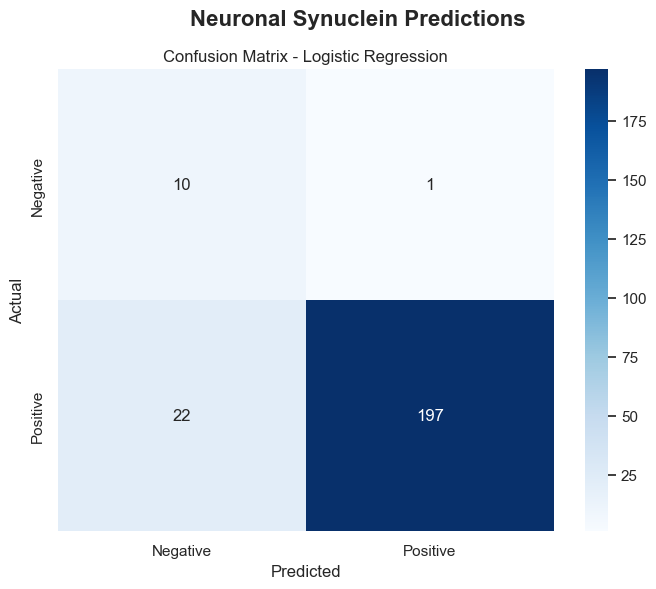

In [59]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add the main title and the subtitle
plt.suptitle('Neuronal Synuclein Predictions', fontsize=16, fontweight='bold')
plt.title('Confusion Matrix - Logistic Regression', fontsize=12)
plt.show()


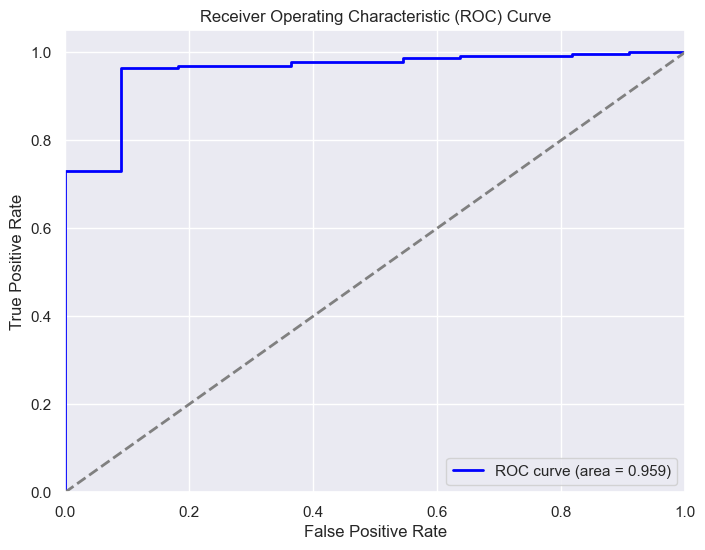

Logistic Regression Classification Report:
ROC-AUC: 0.959
Average Precision (AP): 0.998


In [67]:
# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display the results
print(f"{model_name} Classification Report:")
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Average Precision (AP): {average_precision:.3f}")


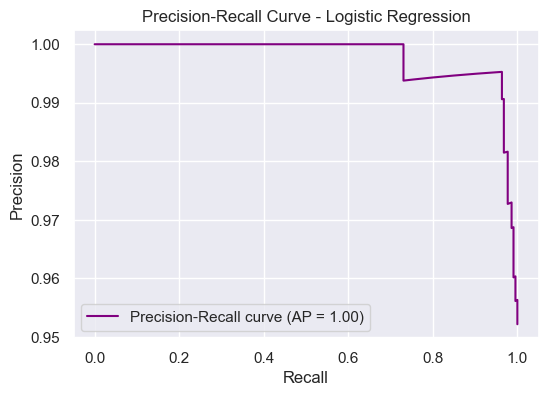

{'Confusion Matrix': array([[ 10,   1],
       [ 22, 197]], dtype=int64), 'ROC AUC': 0.958904109589041, 'Average Precision (AP)': 0.9977657268650819}


In [68]:
# Plotting Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple', label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend(loc="lower left")
plt.show()

# Displaying evaluation metrics
model_performance = {
    "Confusion Matrix": conf_matrix,
    "ROC AUC": roc_auc,
    "Average Precision (AP)": average_precision
}

print(model_performance)

<a id="section-10"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">10. Interpretation of the Results of Logistic Regression</p>

### Key Metrics:

<u>Precision:</u><br>
Class 0 (Negative): 0.312 indicates that only 31.2% of the model's predictions for "negative" cases are correct.<br>
Class 1 (Positive): 0.995 means that when the model predicts someone is positive for neuronal synuclein disease, it is correct 99.5% of the time.<br>
<u>Recall:</u><br>
Class 0 (Negative): 0.909 indicates the model captures 90.9% of true negatives. <br>
Class 1 (Positive): 0.900 means the model correctly identifies 90% of those who actually have the disease.<br>
<br>
<u>F1-Score:</u><br>
Combines precision and recall:
Class 0 (Negative): 0.465 indicates weaker performance for detecting true negatives.<br>
Class 1 (Positive): 0.945 suggests strong performance for detecting true positives.<br>
<br>
<u>Accuracy:</u><br>
Overall, the model correctly classifies 90% of cases.<br>
ROC-AUC (0.959):<br>
This high value indicates excellent discrimination between positive and negative cases.
<u>verage Precision (0.998):</u><br>
This is the area under the precision-recall curve. A value of 0.591 suggests moderate precision across recall levels, particularly for the minority class (Class 2).<br>
<br>
<u>Confusion Matrix:</u><br>
True Negatives (TN): 10 – Correctly predicted negative cases (Class 0).<br>
False Negatives (FN): 1 – Predicted negative (Class 0) but actually positive (Class 1).<br>
True Positives (TP): 197 – Correctly predicted positive cases (Class 1).<br>
False Positives (FP): 22 – Predicted positive (Class 1) but actually negative (Class 0).<br>

<u>Strengths:</u><br>
The model excels at identifying positive cases (Class 1), with high precision and recall for this class.
Overall accuracy and ROC-AUC are very high, indicating the model is generally effective.<br><br>
<u>Weaknesses:</u><br>
The model struggles with the minority class (Class 0, negative cases), as seen in its low precision (31.2%) and F1-score (0.465).
This issue arises because the dataset is imbalanced (Class 1 has 219 cases vs. 11 for Class 2). SMOTE helped improve recall for Class 2 (0.909), but precision remains low.

### Conclusion:
#### The logistic regression model is highly effective at identifying positive cases, with a very high precision and recall for the positive class. However, the precision for the negative class is quite low, indicating that when the model predicts a negative result, it is often incorrect. The recall for the negative class is high, meaning it correctly identifies most of the actual negatives.

#### Overall, the model has high accuracy and performs well on average, but the imbalance in precision between the classes is something to be aware of. This could be due to the imbalance in the number of positive and negative cases.

<a id="section-11"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">11. Evaluation of Fmax Threshold to Determine Disease Positivity</p>

#### As the levels of alpha-synuclein measured increase, the chances of being positive for the disease also increase. 
#### Here we determine the lowest threshold value likely to determine a positive test result.

In [83]:
# List of percentiles to evaluate
percentiles = np.arange(0, 1.01, 0.01)  # From 0% to 100% in 1% increments

# Initialize variables to track the best threshold and performance
best_percentile = None
best_threshold = None
best_auc = 0

# Create a copy of the DataFrame to avoid modifying the original
df_copy = Ultra_Select_Bio.copy()

# Convert SAA_Status to numeric
df_copy['SAA_Status'] = df_copy['SAA_Status'].map({'Positive': 1, 'Negative': 0})

# Loop through percentiles
for percentile in percentiles:
    threshold = df_copy['Fmax_24h_Rep1'].quantile(percentile)
    
    # Use .loc to set Predicted_SAA_Status
    df_copy.loc[:, 'Predicted_SAA_Status'] = (df_copy['Fmax_24h_Rep1'] > threshold).astype(int)
    
    # Calculate AUC and performance metrics
    auc_score = roc_auc_score(df_copy['SAA_Status'], df_copy['Predicted_SAA_Status'])
    
    # Update the best threshold if performance improves
    if auc_score > best_auc:
        best_auc = auc_score
        best_percentile = percentile
        best_threshold = threshold

# Print the results
print(f"Best Percentile: {best_percentile * 100:.2f}%")
print(f"Best Threshold (FMax): {best_threshold:.3f}")
print(f"Best ROC-AUC: {best_auc:.3f}")

# Check classification report for the best threshold
df_copy.loc[:, 'Predicted_SAA_Status'] = (df_copy['Fmax_24h_Rep1'] > best_threshold).astype(int)
print("\nClassification Report:")
print(classification_report(df_copy['SAA_Status'], df_copy['Predicted_SAA_Status'], digits=3))


Best Percentile: 5.00%
Best Threshold (FMax): 76181.750
Best ROC-AUC: 0.817

Classification Report:
              precision    recall  f1-score   support

           0      0.359     0.667     0.467        21
           1      0.990     0.966     0.978       745

    accuracy                          0.958       766
   macro avg      0.675     0.817     0.722       766
weighted avg      0.973     0.958     0.964       766



In [84]:
from ipywidgets import interact, FloatSlider

# Reuse the same DataFrame and best_threshold from the first block
def plot_kde(threshold):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_copy['Fmax_24h_Rep1'][df_copy['SAA_Status'] == 0], fill=True, label='Negative')
    sns.kdeplot(df_copy['Fmax_24h_Rep1'][df_copy['SAA_Status'] == 1], fill=True, label='Positive')
    plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
    
    # Calculate probabilities
    positive_probability = (df_copy['Fmax_24h_Rep1'] > threshold).mean() * 100
    negative_probability = (df_copy['Fmax_24h_Rep1'] <= threshold).mean() * 100
    
    plt.title(f'KDE Plot of Fmax_24h_Rep1 by SAA Status\nProbability of Positive Result: {positive_probability:.2f}% | Probability of Negative Result: {negative_probability:.2f}%')
    plt.xlabel('Fmax_24h_Rep1')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Create the interactive widget with best_threshold as the initial value
interact(plot_kde, threshold=FloatSlider(value=best_threshold, min=df_copy['Fmax_24h_Rep1'].min(), max=df_copy['Fmax_24h_Rep1'].max(), step=0.1))


interactive(children=(FloatSlider(value=76181.75, description='threshold', max=250877.0, min=3124.0), Output()…

<function __main__.plot_kde(threshold)>

In [90]:
# Displaying evaluation metrics
model_performance = {
    "Confusion Matrix": conf_matrix,
    "ROC AUC": round(roc_auc, 3),
    "Average Precision (AP)": round(average_precision, 3)
}

print(model_performance)

{'Confusion Matrix': array([[ 10,   1],
       [ 22, 197]], dtype=int64), 'ROC AUC': 0.959, 'Average Precision (AP)': 0.998}


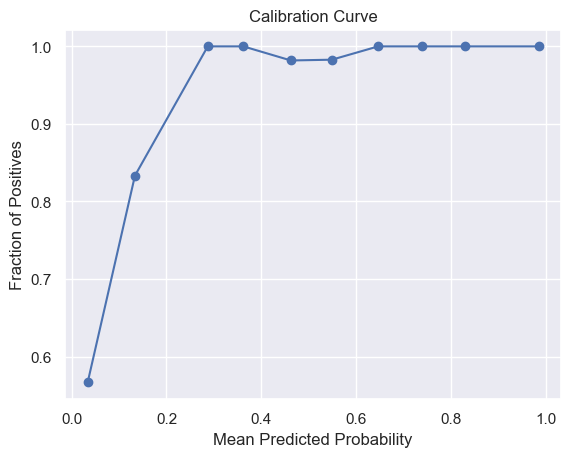

{'Confusion Matrix': array([[ 10,   1],
       [ 22, 197]], dtype=int64), 'ROC AUC': 0.959, 'Average Precision (AP)': 0.998}


In [141]:
# Calibration curve
scaler = MinMaxScaler()
df_copy['Fmax_24h_Rep1_scaled'] = scaler.fit_transform(df_copy[['Fmax_24h_Rep1']]) 
prob_true, prob_pred = calibration_curve(df_copy['SAA_Status'], df_copy['Fmax_24h_Rep1_scaled'], n_bins=10)

# Plot the calibration curve
plt.plot(prob_pred, prob_true, marker='o')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.show()

# Displaying evaluation metrics
model_performance = {
    "Confusion Matrix": conf_matrix,
    "ROC AUC": round(roc_auc, 3),
    "Average Precision (AP)": round(average_precision, 3)
}
print(model_performance)


#### Evaluation of the FMax Variable Threshold 

This classification report evaluates a model with a threshold set at the 5th percentile (FMax = 76181.75) for predicting NSD status. 
Key insights include:<br>
<br>
<u>Class 0 (Negative):</u>
Low precision (35.9%) indicates many false positives.<br>
High recall (66.7%) shows the model captures most true negatives.<br>
F1-score (46.7%) reflects poor overall performance for negatives.<br>
<br>
<u>Class 1 (Positive):</u>
Very high precision (99%) and recall (96.6%) demonstrate excellent detection of positives.<br>
F1-score (97.8%) confirms strong performance for this class.<br>
<u>Overall Metrics:</u>
Accuracy (95.8%) and ROC-AUC (0.817) indicate good overall model performance.
Macro average shows imbalance, with weaker performance for Class 0.
Weighted average highlights the dominance of Class 1 in the dataset.

Overall, this means that this variable has a strong positive relationship to determining positivity for NDS. Test results over an FMax value of 76181.75
give an accuracy level of almost 96%. This accuracy level is somewhat misleading however because the total count of negative results is much fewer. The
model predicts most true negatives but also tends to give quite a few false positives as well. 

The conclusion for this variable by itself is that it may be useful for an early screening, but using this value alone is not sufficient for a definitive diagnosis.



# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">12. Evaluation of Time to Threshold to Determine Disease Positivity</p>

In [145]:
# List of percentiles to evaluate
percentiles = np.arange(0, 1.01, 0.01)  # From 0% to 100% in 1% increments

# Initialize variables to track the best threshold and performance
best_percentile = None
best_threshold = None
best_auc = 0

# Create a copy of the DataFrame to avoid modifying the original
df_copy2 = Ultra_Select_Bio.copy()

# Convert SAA_Status to numeric
df_copy2['SAA_Status'] = df_copy2['SAA_Status'].map({'Positive': 1, 'Negative': 0})

# Loop through percentiles
for percentile in percentiles:
    threshold = df_copy2['TTT_24h_Rep1'].quantile(percentile)
    
    # Use .loc to set Predicted_SAA_Status
    df_copy2.loc[:, 'Predicted_SAA_Status'] = (df_copy2['TTT_24h_Rep1'] > threshold).astype(int)
    
    # Calculate AUC and performance metrics
    auc_score = roc_auc_score(df_copy2['SAA_Status'], df_copy2['Predicted_SAA_Status'])
    
    # Update the best threshold if performance improves
    if auc_score > best_auc:
        best_auc = auc_score
        best_percentile = percentile
        best_threshold = threshold

# Print the results
print(f"Best Percentile: {best_percentile * 100:.2f}%")
print(f"Best Threshold (TTT): {best_threshold:.3f}")
print(f"Best ROC-AUC: {best_auc:.3f}")

# Check classification report for the best threshold
df_copy2.loc[:, 'Predicted_SAA_Status'] = (df_copy2['TTT_24h_Rep1'] > best_threshold).astype(int)
print("\nClassification Report:")
print(classification_report(df_copy2['SAA_Status'], df_copy2['Predicted_SAA_Status'], digits=3, zero_division=0))



Best Percentile: 100.00%
Best Threshold (TTT): 23.540
Best ROC-AUC: 0.500

Classification Report:
              precision    recall  f1-score   support

           0      0.027     1.000     0.053        21
           1      0.000     0.000     0.000       745

    accuracy                          0.027       766
   macro avg      0.014     0.500     0.027       766
weighted avg      0.001     0.027     0.001       766



In [147]:
from ipywidgets import interact, FloatSlider
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reuse the same DataFrame and best_threshold from the first block
def plot_kde(threshold):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_copy2['TTT_24h_Rep1'][df_copy2['SAA_Status'] == 0], fill=True, label='Negative')
    sns.kdeplot(df_copy2['TTT_24h_Rep1'][df_copy2['SAA_Status'] == 1], fill=True, label='Positive')
    plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
    
    # Calculate probabilities
    positive_probability = (df_copy2['TTT_24h_Rep1'] > threshold).mean() * 100
    negative_probability = (df_copy2['TTT_24h_Rep1'] <= threshold).mean() * 100
    
    plt.title(f'KDE Plot of TTT_24h_Rep1 by SAA Status\nProbability of Positive Result: {positive_probability:.2f}% | Probability of Negative Result: {negative_probability:.2f}%')
    plt.xlabel('TTT_24h_Rep1')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Create the interactive widget with best_threshold as the initial value
interact(plot_kde, threshold=FloatSlider(value=best_threshold, min=df_copy2['TTT_24h_Rep1'].min(), max=df_copy2['TTT_24h_Rep1'].max(), step=0.1))


interactive(children=(FloatSlider(value=23.54, description='threshold', max=23.54, min=3.33), Output()), _dom_…

<function __main__.plot_kde(threshold)>

### Evaluation of TTT Variable

If we consider the kernel density graph shown above, we can see that although there are definite negative correlations between positivity for NSD,
the range of values overlaps almost completely until the threshold of 23.54. Below this threshold number, the accuracy level is less than 3%, and has a ROC
of .5, meaning the same accuracy as if we flipped a coin. We can not use the TTT variable alone to give us much information except that if the TTT Value
is greater than 23.54 the chance of a positive result is less than 1%. This is not very useful however, because this number represents only a small 
amount of the overall values given.

Using this variable alone is not a useful evaluation method.

<a id="section-13"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;;">13. Conclusion</p>

<b>Our first objective was to determine if we could predict incidence of neuronal synuclein disease (NSD) using logistic regression and the FMax and TTT variables. The logistic regression model performs exceptionally well in identifying positive cases of neuronal synuclein disease (Class 1), with high precision, recall, and overall accuracy (90%). However, it struggles with detecting negative cases (Class 0), reflected in low precision and F1-score. The model's strengths make it suitable for applications prioritizing correct identification of positive cases, but it has limitations in handling imbalanced data which should be addressed to improve negative case predictions. It will be difficult to improve upon this model with the current data, due to the significant imbalance in the testing results from participants in the study.<br>
<br>
<b>Our second objective was to further analyze if a prediction of NSD was possible, what would be the threshold to determine a positive or negative result. Looking at the FMax variable, we can predict at just a 5% threshold, the incidence of a correct positive diagnosis is 99%. However, the incidence of false positives is also high with a 35.9% precision level meaning nearly 36% of the people who would show as positive are actually negative. This would potentially be acceptable for a very early, first pass screening test, however, could not provide a definite diagnosis. Looking at just the Time to Threshold variable gave us inconclusive results because the prediction accuracy was only at about 50% for most of the data.

<b>Ultimately, improving either the Logistic Regression model or the Threshold Model will be challenging without including more control subjects in the study. However, increasing control numbers is particularly difficult with cerebrospinal fluid due to the invasive nature of this medical test. Nevertheless, it is possible to see conclusive evidence that the presence of alpha-synuclein protein in cerebrospinal fluid serves as a strong indicator of the disease.</b>


<a id="section-14"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">14. References</p>

1 Data used in the preparation of this article was obtained on 2024-09-18 from the Parkinson’s Progression Markers Initiative (PPMI) database (www.ppmi-info.org/access-dataspecimens/download-data), RRID:SCR_006431. For up-to-date information on the study, visit www.ppmi-info.org. 
PPMI – a public-private partnership – is funded by the Michael J. Fox Foundation for Parkinson’s Research, and funding partners; including the Michael J. Fox Foundation for Parkinson’s Research and funding partners, including 4D Pharma, Abbvie, AcureX, Allergan, Amathus Therapeutics, Aligning Science Across Parkinson's, AskBio, Avid Radiopharmaceuticals, BIAL, BioArctic, Biogen, Biohaven, BioLegend, BlueRock Therapeutics, Bristol-Myers Squibb, Calico Labs, Capsida Biotherapeutics, Celgene, Cerevel Therapeutics, Coave Therapeutics, DaCapo Brainscience, Denali, Edmond J. Safra Foundation, Eli Lilly, Gain Therapeutics, GE HealthCare, Genentech, GSK, Golub Capital, Handl Therapeutics, Insitro, Jazz Pharmaceuticals, Johnson & Johnson Innovative Medicine, Lundbeck, Merck, Meso Scale Discovery, Mission Therapeutics, Neurocrine Biosciences, Neuron23, Neuropore, Pfizer, Piramal, Prevail Therapeutics, Roche, Sanofi, Servier, Sun Pharma Advanced Research Company, Takeda, Teva, UCB, Vanqua Bio, Verily, Voyager v. 25MAR2024 Therapeutics, the Weston Family Foundation and Yumanity Therapeutics.   https://www.ppmi-info.org/<br>
<br>
2  Prevalence & Incidence | Parkinson's Foundation  https://www.parkinson.org

